# Fictituous Datasets

## Required Modules
Let us import the modules required to execute B-FADE. The next cell is not necessery if you installed the module via package managers. So you just would skip the cell an jump over.

In [20]:
from sys import path as syspath
from os import path as ospath
syspath.append(ospath.join(ospath.expanduser("~"),
                           '/home/ale/Desktop/b-fade/src'))

In [21]:
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from bfade.elhaddad import ElHaddadCurve, ElHaddadBayes
from bfade.dataset import SyntheticDataset

We istantiate a curve whereby the dataset is generated. Then we generate a regular grid and a noisy dataset for later use.

14:47:47 - bfade.abstract - WARNING - ElHaddadCurve.inspect
14:47:47 - bfade.util - DEBUG - SHOW PIC: EH-8-700_curve


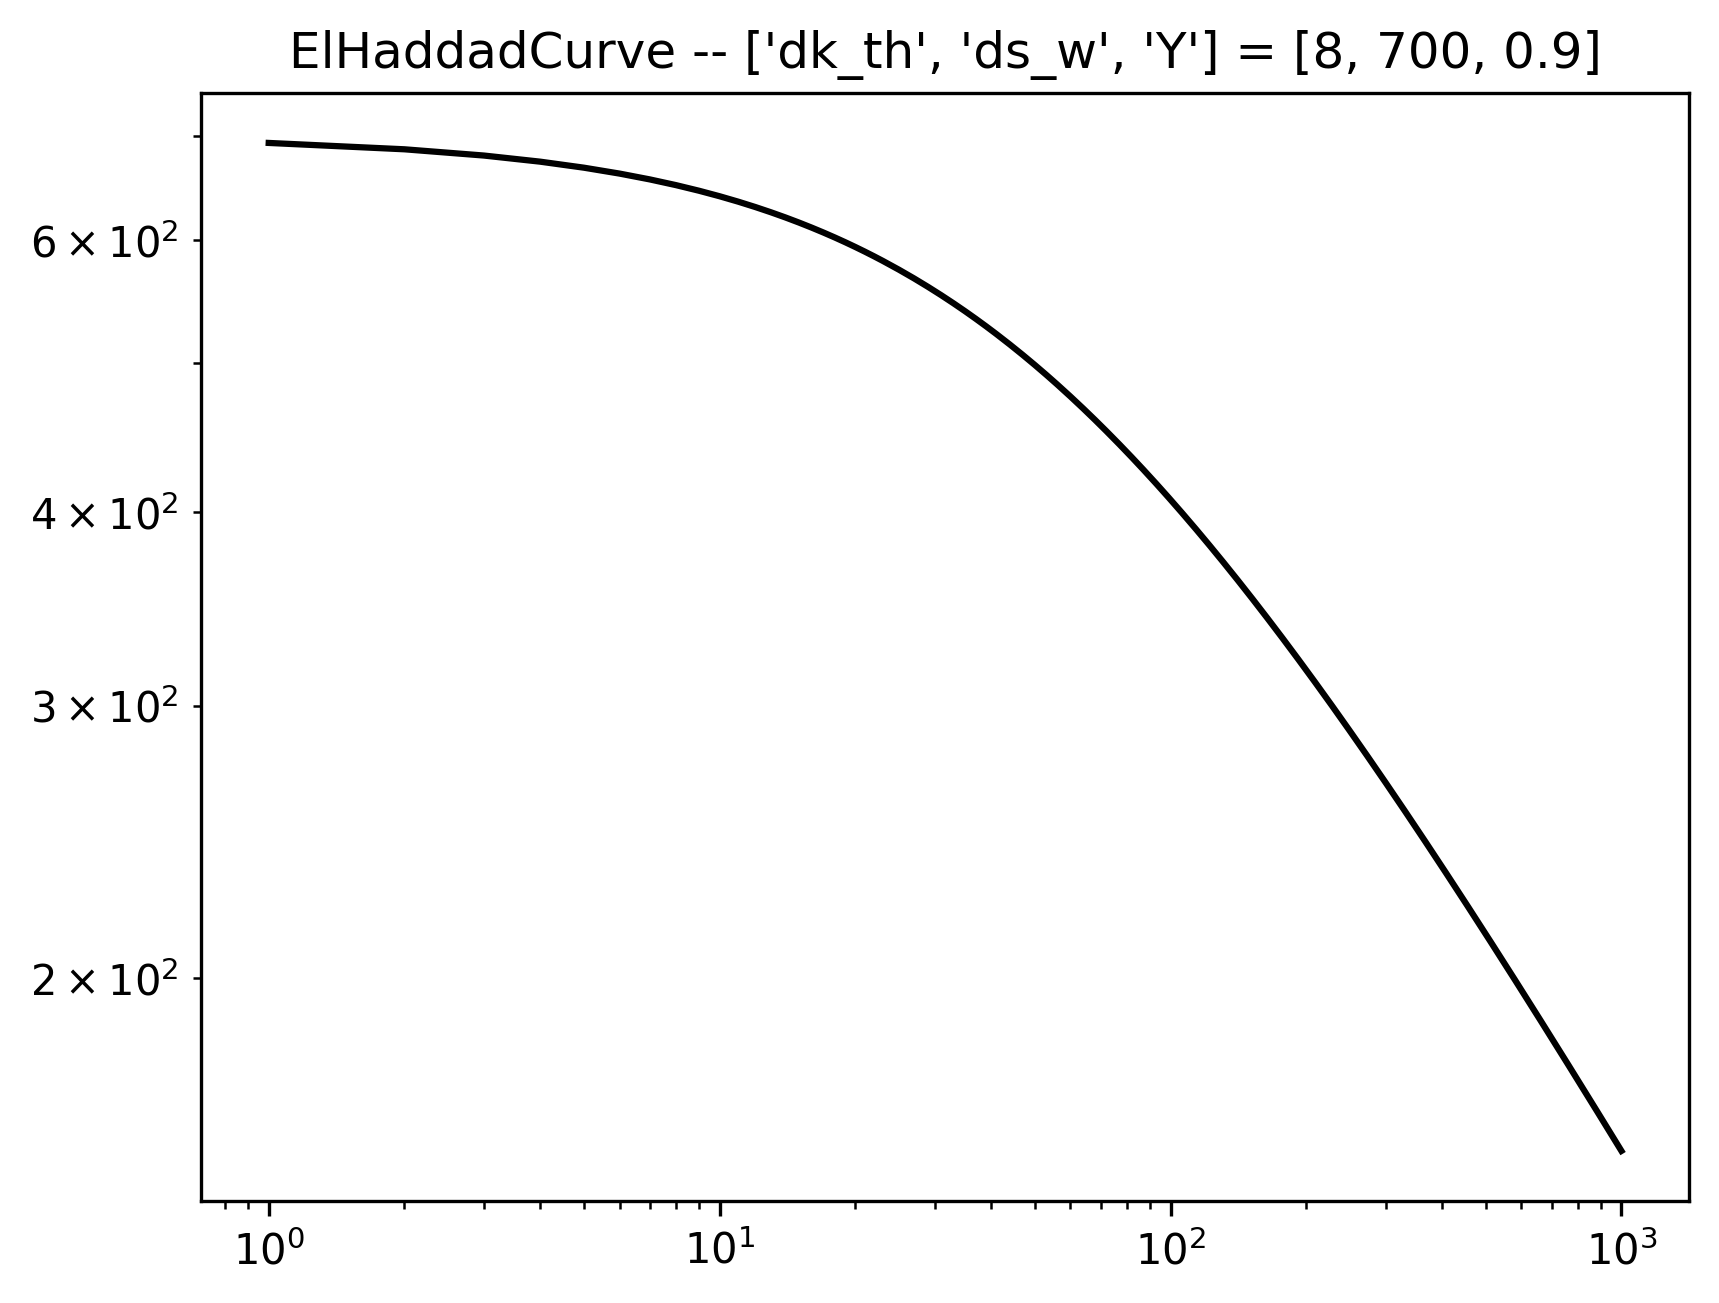

In [22]:
eh = ElHaddadCurve(metrics=np.log10, dk_th=8, ds_w=700, Y=0.9, name="EH-8-700")
eh.inspect(np.linspace(1,1000,1000), scale="log")

14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.config
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.make_grid
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.make_classes
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.inspect
14:47:48 - bfade.util - DEBUG - SHOW PIC: EH-8-700_data


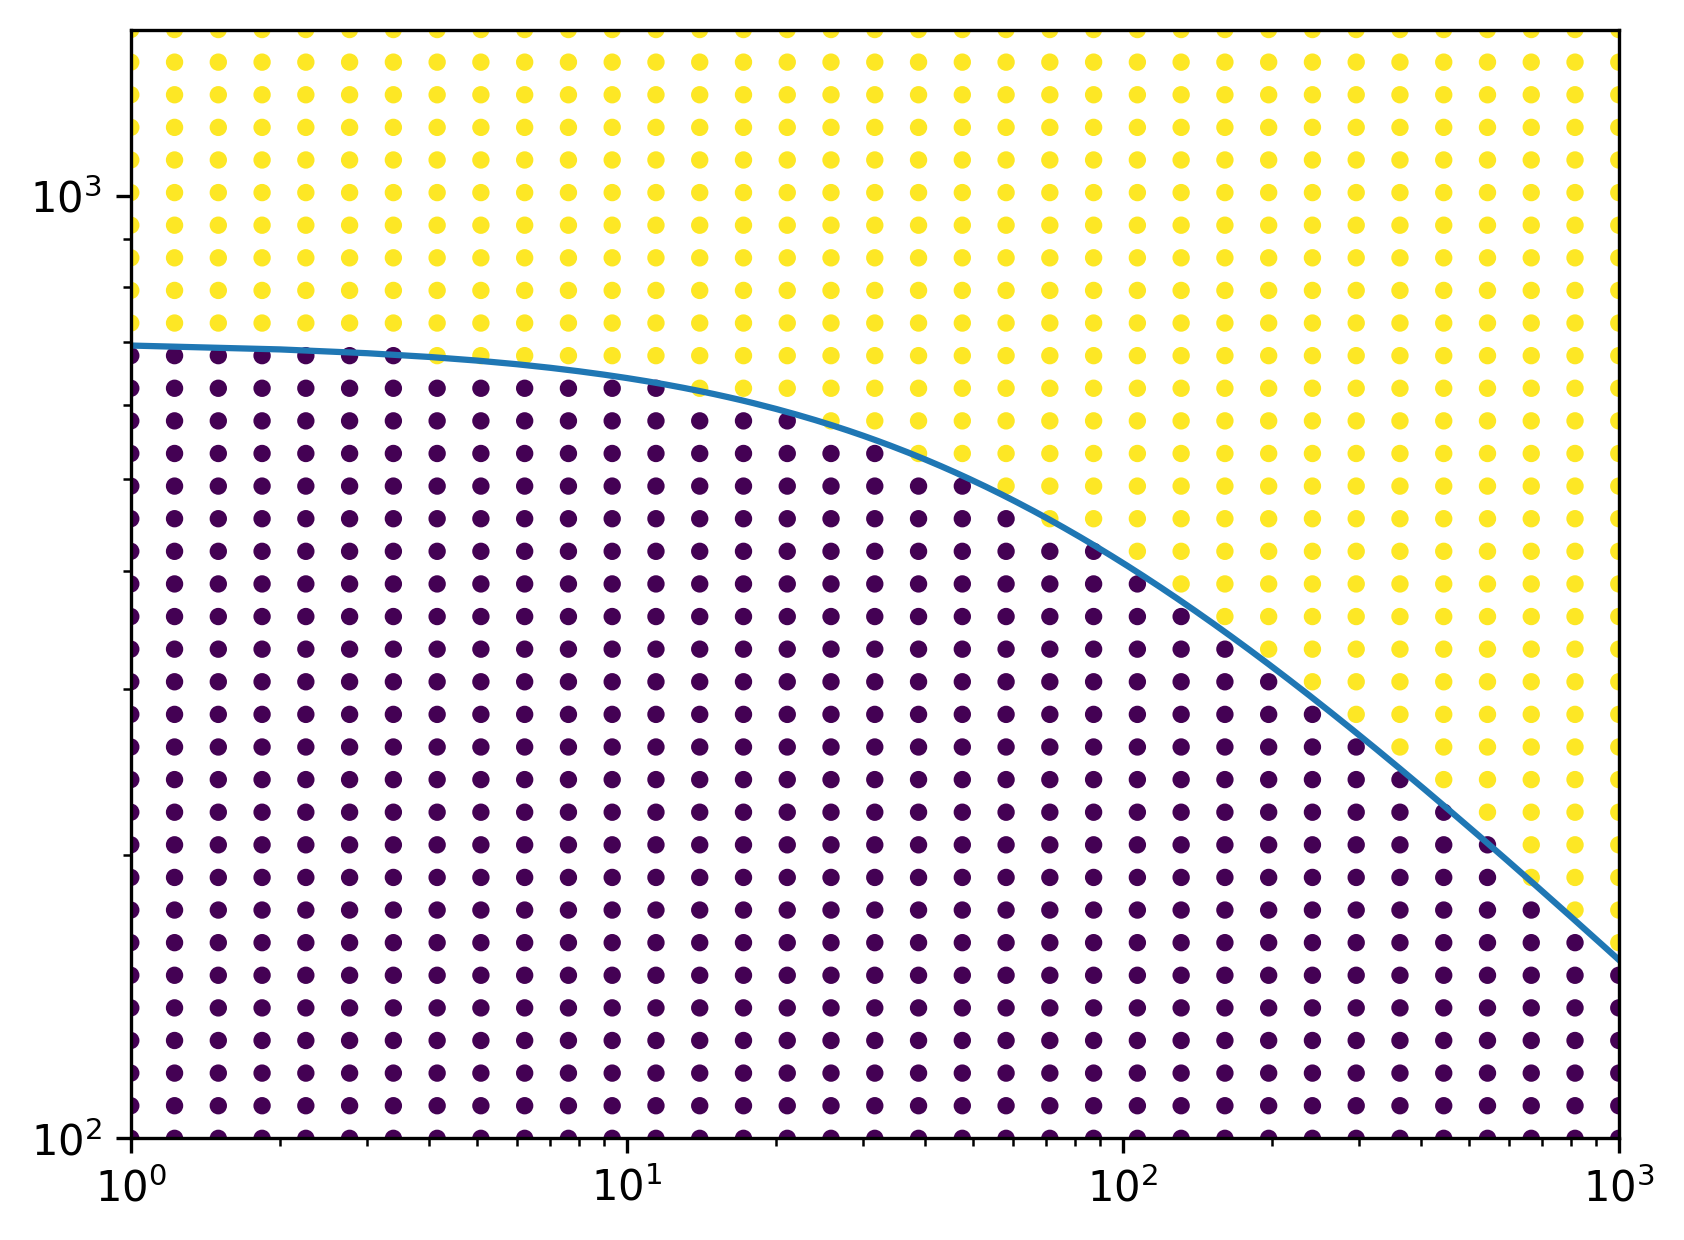

In [23]:
sd = SyntheticDataset(name="EH-8-700")
sd.make_grid([1,1000], [100,1500], 35, 35, spacing="log")
sd.make_classes(eh)
sd.inspect([1,1000], [100,1500], scale="log", curve=eh, x=np.linspace(1, 1000,1000))

14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.config
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.make_grid
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.make_classes
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.add_noise
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.crop_points
14:47:48 - bfade.dataset - DEBUG - SyntheticDataset.inspect
14:47:48 - bfade.util - DEBUG - SHOW PIC: EH-8-700_data


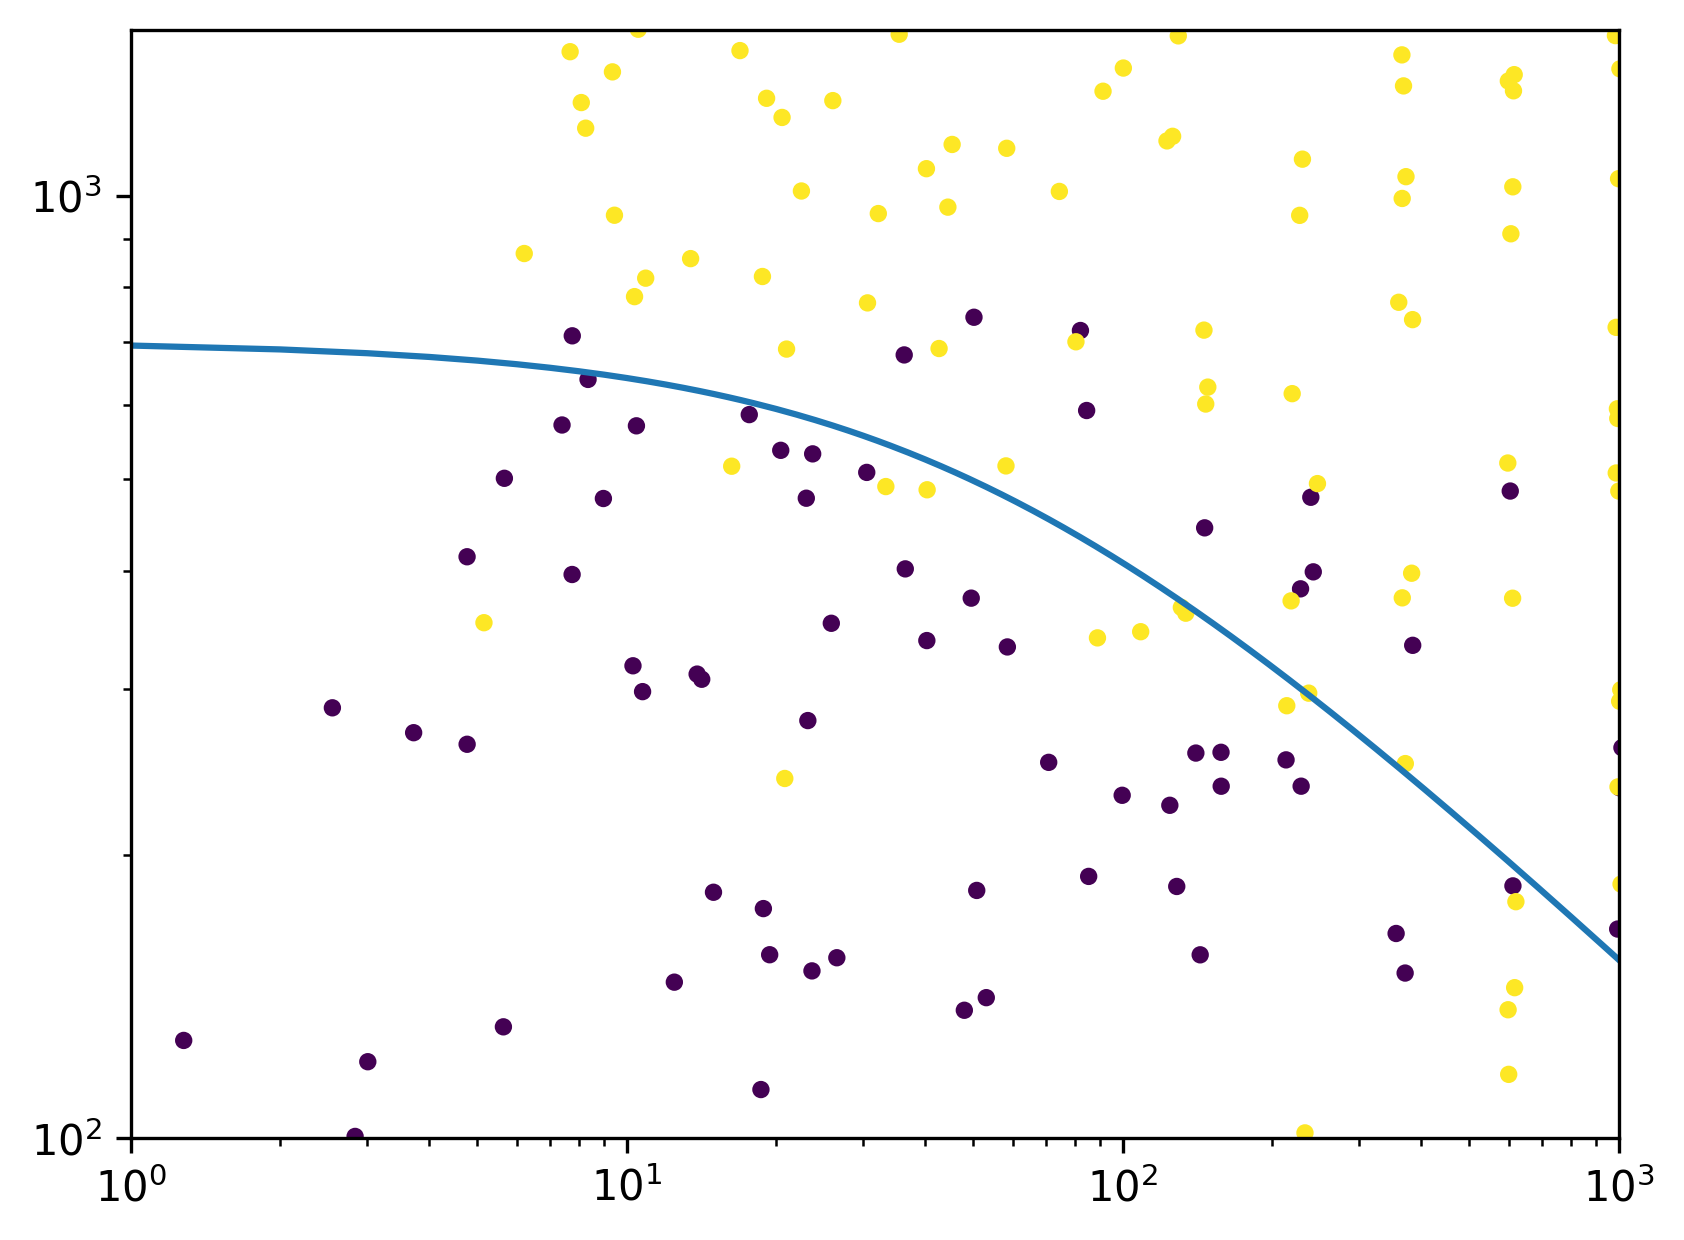

In [24]:
sd_noise = SyntheticDataset(name="EH-8-700")
sd_noise.make_grid([1,1000], [100,1500], 15, 15, spacing="log")
sd_noise.make_classes(eh)
sd_noise.add_noise(10, 200) # <- make noisy data
sd_noise.crop_points() # <- ensure only physically meaningful data
sd_noise.inspect([1,1000], [100,1500], scale="log", curve=eh, x=np.linspace(1, 1000,1000))

## Export Data

The operations below exports the datasets as separate ``.csv`` files that can be read later.

In [25]:
for d,l in zip([sd, sd_noise], ["EH-7-800", "EH-7-800_Noisy"]):
    pd.DataFrame({"sqrt_area": d.X[:,0],
                  "delta_sigma": d.X[:,1],
                  "failed": d.y,
                  "Y": [0.9]*d.y.shape[0],
                  "test": [0]*d.y.shape[0]}).to_csv("./"+ l +".csv")